Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

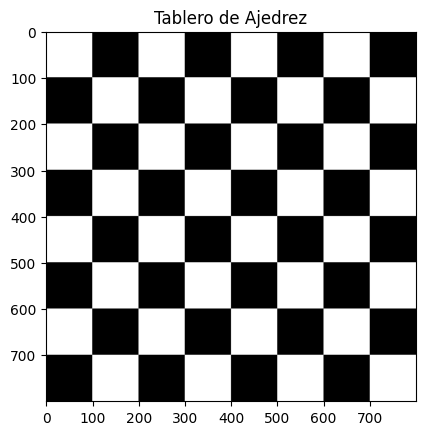

In [2]:
#Create an image with three planes


tablero = 8
cuadro = 100

#Initialize a zero array with the desired board size (800px*800px)
#and with 3 channels for color

color_img = np.zeros((tablero*cuadro,tablero*cuadro, 3), dtype = np.uint8)

#Loop through rows and columns. If the sum of rows and columns is even,
#paint it white. By not specifying a channel, all 3 (R, G, and B) are set to 255,
#thus painting it white.
for i in range(tablero):
    for k in range(tablero):
        if (i+k)%2==0:
            color_img[i*cuadro:(i+1)*cuadro, k*cuadro:(k+1)*cuadro] = 255

#Dimensions

#Visualize with matplotlib (without specifying the gray color map)
plt.imshow(color_img) 
plt.title("Tablero de Ajedrez")
plt.show()


TAREA 2: Crear una imagen estilo Mondrian

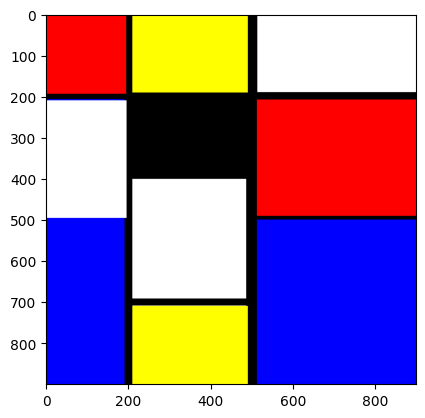

In [3]:
import cv2
# Create a white canvas
color_img = np.zeros((900,900,3), dtype = np.uint8)
color_img[:,:,:] = 255

# Draw vertical lines
cv2.line(color_img, (200,0),(200,900),(0,0,0),17)
cv2.line(color_img, (500,0),(500,900),(0,0,0),25)

# Draw horizontal lines
cv2.line(color_img, (0,200), (900,200), (0,0,0), 20)
cv2.line(color_img, (500,500), (900, 500), (0,0,0), 22)
cv2.line(color_img, (0, 500), (200, 500), (0,0,0), 15)
cv2.line(color_img, (200,700),(500,700), (0,0,0), 15)

# Draw colored rectangles
cv2.rectangle(color_img, (0,0), (194,193), (255,0,0), -1)  # Red
cv2.rectangle(color_img, (513, 500),(900,900), (0,0,255), -1)  # Blue
cv2.rectangle(color_img, (210,0), (490,190), (255,255,0), -1)  # Yellow
cv2.rectangle(color_img, (200,200),(500,400), (0,0,0), -1)  # Black
cv2.rectangle(color_img, (513,208), (900, 490), (255,0,0), -1)  # Red
cv2.rectangle(color_img, (0,207), (190,900), (0,0,255), -1)  # Blue
cv2.rectangle(color_img, (0, 210), (195, 495), (255,255,255), -1)  # White
cv2.rectangle(color_img,(210, 710),(490,900), (255,255,0),-1)  # Yellow


# Display the image
plt.imshow(color_img)



TAREA 3: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

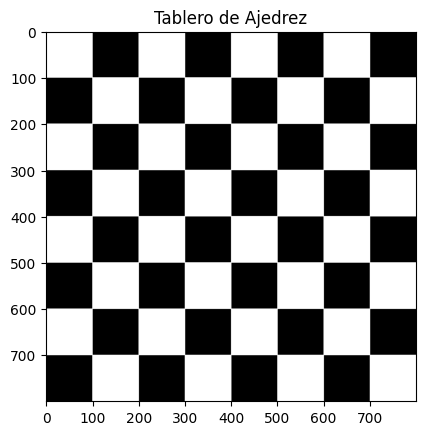

In [4]:
# Define the dimensions of the chessboard
tablero = 8  # Number of squares in each row/column
cuadro = 100  # Size of each square in pixels

# Create a blank black image with 3 color channels (RGB)
# The size is (tablero * cuadro) x (tablero * cuadro) to accommodate the full chessboard
color_img = np.zeros((tablero*cuadro, cuadro*tablero, 3), dtype=np.uint8)

# Iterate through each square of the chessboard
for i in range(tablero):
    for k in range(tablero):
        # Check if the square should be white
        # (i+k) % 2 == 0 creates the alternating pattern of a chessboard
        if (i+k) % 2 == 0:
            # Draw a white rectangle (square) at the appropriate position
            # The position is calculated based on the current indices (i, k) and the size of each square
            # The color (255,255,255) represents white in RGB
            # The -1 parameter fills the rectangle
            cv2.rectangle(color_img, (i*cuadro, k*cuadro), ((i+1)*cuadro, (k+1)*cuadro), (255,255,255), -1)

# Display the resulting chessboard image
plt.imshow(color_img)
plt.title('Tablero de Ajedrez')
plt.show()



TAREA 4: Modifica de forma libre los valores de un plano de la imagen

In [5]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # frame by frame
    ret, frame = vid.read()

    if ret:
        # Separate channels
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        
        # Modify a fragment of the blue channel with value 1 (black)
        b[0:100,25:180] = 1    

        # Input image dimensions
        h, w, c = frame.shape

        # Concatenate the three planes of the frame horizontally
        collage = np.hstack((r, g, b))
    
        # Show frame resized to half for it to fit on screen
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Stop when ESC is pressed
    if cv2.waitKey(20) == 27:
        break
  
# Release the capture object
vid.release()
# Destroy windows
cv2.destroyAllWindows()

TAREA 5.1:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

In [6]:
vid = cv2.VideoCapture(0)

if not vid.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = vid.read()
    

    # Convert to grayscale to avoid RGB conversion when calculating the minimum and maximum pixel.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    '''
    The argmin() function returns the index of the smallest value in the array
    (2-dimensional in this case) passed as a parameter.
    The index returned by argmin() is one-dimensional, so the unravel_index() function
    must be applied. It takes the one-dimensional index and the image size as parameters.
    unravel_index() returns the 2D coordinates of that index.
    '''
    
    min_location = np.unravel_index(np.argmin(gray), gray.shape)
    max_location = np.unravel_index(np.argmax(gray), gray.shape)


    # Draw circles around the brightest and darkest pixels
    cv2.circle(frame, max_location[::-1], 10, (0,0,0), 2)  # Black circle for brightest
    cv2.circle(frame, min_location[::-1], 10, (255,255,255), 2)        # White circle for darkest

    cv2.imshow('Image with circles', frame)

    # Stop when ESC is pressed or window is closed
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

TAREA 5.2: ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [7]:


vid = cv2.VideoCapture(0)

# If the camera can´t be opened displays an error
if not vid.isOpened():
    print("Error: Could not open camera.")
    exit()
    


def find_extreme_zone(img, size, mode='max'):
    '''
    Function to find the brightest or darkest zone in an image
    Parameters:
    - img: input grayscale image
    - size: size of the zone to search (e.g., 8 for 8x8)
    - mode: 'max' for brightest, 'min' for darkest
    '''

    h, w = img.shape  # Get the height and width of the image
    
    # Initialize the extreme sum based on the mode
    extreme_sum = float('-inf') if mode == 'max' else float('inf')
    extreme_pos = None  # Variable to store the position of the extreme zone
    
    # Iterate through the image, leaving a margin of 'size' pixels
    for y in range(h - size - 1):
        for x in range(w - size - 1):
            # Calculate the sum of pixel values in the current window
            window_sum = np.sum(img[y:y+size, x:x+size])
            
            # Update extreme_sum and extreme_pos if a new extreme is found
            if (mode == 'max' and window_sum > extreme_sum) or (mode == 'min' and window_sum < extreme_sum):
                extreme_sum = window_sum
                extreme_pos = (x, y)
    
    # Return the position of the extreme zone
    return extreme_pos  

while True:
    ret, frame = vid.read()
    

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Find brightest and darkest 8x8 zones
    brightest_zone = find_extreme_zone(gray, 8, 'max')
    darkest_zone = find_extreme_zone(gray, 8, 'min')

    # Draw rectangles around the brightest and darkest zones
    cv2.rectangle(frame, brightest_zone, (brightest_zone[0]+8, brightest_zone[1]+8), (0,255,0), 2)
    cv2.rectangle(frame, darkest_zone, (darkest_zone[0]+8, darkest_zone[1]+8), (0,0,255), 2)

   
    

    cv2.imshow('Image with zones', frame)

    if cv2.waitKey(20) == 27:  
        break

vid.release()
cv2.destroyAllWindows()

TAREA 6: Llevar a cabo una propuesta propia de pop art

In [8]:
vid = cv2.VideoCapture(0)

# Camera dimensions
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Force half resolution to occupy less screen space
w = int(w/2)
h = int(h/2)
# Set the new dimensions for the video capture
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Combined image 5x original (horizontal)
collage = np.zeros((h, w*5, 3), dtype=np.uint8)

# Define a list of colors for the gradient effect (in BGR format)
# The gradient transitions from yellow to red
colors = [
    (0, 255, 255),  # Yellow
    (0, 191, 255),  # Yellow-Orange
    (0, 127, 255),  # Orange
    (0, 64, 255),   # Red-Orange
    (0, 0, 255)     # Red
]

while True:
    # Frame by frame
    ret, frame = vid.read()

    if ret:  # If frame is successfully captured
        # Resize the frame to match our desired dimensions
        # INTER_NEAREST is used for faster processing, though it may reduce quality (Lineal Interpolation)
        frame = cv2.resize(frame, (w, h), cv2.INTER_NEAREST)

        # Create 5 color variations of the frame
        for i in range(5):

            '''
            Apply a color tint to the frame
            addWeighted is used to blend the original frame with the color tint
            -frame is the original frame
            -0.6 is the weight of the original frame
            -np.full_like(frame, colors[i]) creates an array of the same shape as the frame, filled with the color value
            -0.4 is the weight of the color tint
            '''

            tinted = cv2.addWeighted(frame, 0.6, np.full_like(frame, colors[i]), 0.4, 0)
            
            # Place the tinted frame in its corresponding position in the collage
            collage[:, i*w:(i+1)*w] = tinted

        # Display the final collage with all color variations
        cv2.imshow('Color Gradient', collage)
    
    # Stop when ESC is pressed
    if cv2.waitKey(20) == 27:
        break

# Clean up: release the video capture object
vid.release()
# Destroy windows
cv2.destroyAllWindows()